In [2]:
import numpy as np
import matplotlib.pyplot as plt

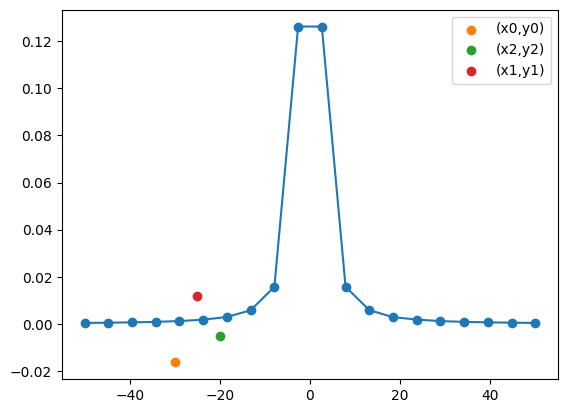

0.04206470822323488


In [21]:
# first try: L2 optimzation,

def SimpRule(p_0, p_1, p_2, h):
   approx_int = 0
   approx_int += ((4*h)/3)*p_1
   approx_int += (h/3) * p_0
   approx_int += (h/3)*p_2
   return approx_int
   
x = np.linspace(-50,50,20)
y = 1/(1+x**2)
delta = x[1] - x[0]
order = 18
n = len(x)

y = 1/(1+x**2)
v = (np.reshape(x, (n, 1)) * np.ones(order + 1)) ** [i for i in range(order, -1, -1)]
v_new = np.transpose(v) @ v
y_matrix = np.transpose(v) @ y
coef_matrix = np.linalg.solve(v_new, y_matrix)

p=0
x_0 = -30
x_2 = 20
x_1= (x_0 + x_2)/2
h = abs(x_2- x_1)
p_0 = 0
p_2= 0
p_1 = 0
for j in range(order+1):
     p_0 += coef_matrix[len(coef_matrix) - (j+1)]* x_0**j
     p_2 += coef_matrix[len(coef_matrix) - (j+1)]* x_2**j
     p_1 += coef_matrix[len(coef_matrix) - (j+1)]* x_1**j
     p += coef_matrix[len(coef_matrix) - (j+1)]* x**j


approx_int = SimpRule(p_0, p_1, p_2, h)
plt.plot(x,p)
plt.scatter(x,y)
plt.scatter(x_0,p_0, label = "(x0,y0)")
plt.scatter(x_2,p_2, label = "(x2,y2)")
plt.scatter(x_1,p_1, label = "(x1,y1)")
plt.legend()
plt.show()
print(approx_int)
# this method gives good approximations when h is very small, can we find the integral over small intervals then add them to find the integral over a bigger interval

# analytical value of integral: 0.008326202259